### SVG visuals of NN architectures I experimented with.

In [2]:
# Imports
# Basics
import sys
from __future__ import print_function, division
import pandas as pd 
import numpy as np
import random
from itertools import cycle
# from matplotlib import pyplot as plt
# %matplotlib inline

# keras
np.random.seed(13)
from keras.models import Sequential
from keras.layers import Dense, Embedding, Reshape, Activation, LSTM, Dropout, Bidirectional
from IPython.display import SVG
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.optimizers import SGD, RMSprop, Nadam
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

### some files to play with 

In [3]:
# Each txt file represents one song. Open each file and tokenize.
files = !ls /filepath/the_biebs

In [4]:
# separate the puncuation to be treated as unique "words" as they will not be removed at tokenizer step
punc = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\''
# EOS = '__fin___'
texts = []
for file in files:
    text = open('/filepath/the_biebs/' + file).read().lower()
    for p in punc:
        if p in text:
            text = text.replace(p, ' ' + p + ' ')
    texts.append(text)

In [5]:
# Tokenize. Output from fit_on_texts is a list of lists.
tokenizer = Tokenizer(filters='')
tokenizer.fit_on_texts(texts) 

In [6]:
vocab_indices = tokenizer.word_index
indices_vocab = dict((i, v) for v, i in vocab_indices.items())
vocabsize = len(tokenizer.word_index) + 1 # need this bc word_index starts at 1
maxlen = 10
step = 1

### Straightforward, single layer LSTM.

In [ ]:
model = Sequential()
# The Embedding layer allows us to map words into dense vectors as inputs.
model.add(Embedding(vocabsize, 100, input_length=maxlen, name='Seqs_to_Dense_Vectors'))
model.add(LSTM(128, name='Network_Training'))
model.add(Dense(vocabsize, name='Next_Layer'))
model.add(Activation('softmax', name='Predicted_Output'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [ ]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
plot_model(model, to_file='model.png')

### Deep Learning model. Not enough data to support this structure. Bidirectional wrapper good idea as memory for past and future inputs. Could have looked into adding dropout layers before dense layers, but would not have overcome amount of data issue.

In [9]:
# more complex model
sf_model = Sequential()
sf_model.add(Embedding(vocabsize, 100, input_length=maxlen, name='Seqs_to_Dense_Vectors'))
sf_model.add(Bidirectional(LSTM(64, return_sequences=True, name='Memory_1a'), name='BD_1'))
sf_model.add(Dense(vocabsize, name='Fully_Connected_1b'))

sf_model.add(Bidirectional(LSTM(128, return_sequences=True, name='Memory_2a'), name='BD_2'))
sf_model.add(Dense(vocabsize, name='Fully_Connected_2b'))

sf_model.add(Bidirectional(LSTM(64, return_sequences=False, name='Memory_3a'), name='BD_3'))
sf_model.add(Dense(vocabsize, name='Fully_Connected_3b'))
sf_model.add(Activation('softmax', name='Predicted_Output'))

optimizer = RMSprop(lr=0.01)
sf_model.compile(loss='categorical_crossentropy', optimizer=optimizer)

SVG(model_to_dot(sf_model, show_shapes=True).create(prog='dot', format='svg'))
plot_model(sf_model, to_file='DLmodel.png')

### Final model. Fewer hidden layers, dropout added to prevent overfitting, played around with different optimizers.

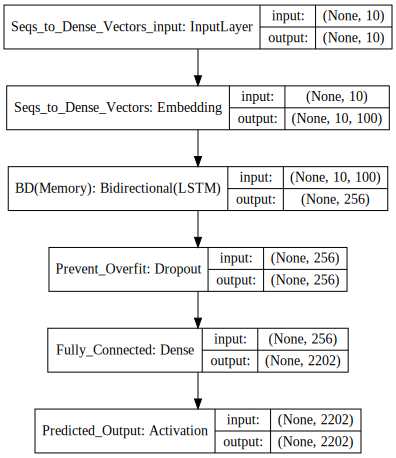

In [7]:
model2 = Sequential()
model2.add(Embedding(vocabsize, 100, input_length=maxlen, name='Seqs_to_Dense_Vectors'))
# Bidirectional LSTM!!!
model2.add(Bidirectional(LSTM(128, name='Memory'), name='BD'))
model2.add(Dropout(0.3, name='Prevent_Overfit'))
model2.add(Dense(vocabsize, name='Fully_Connected'))
model2.add(Activation('softmax', name='Predicted_Output'))

# try using different optimizers and different optimizer configs
optimizer = Nadam(lr=0.002)
model2.compile(loss= 'categorical_crossentropy', optimizer=optimizer)
SVG(model_to_dot(model2, show_shapes=True).create(prog='dot', format='svg'))

In [8]:
plot_model(model2, to_file='Bidirectional.png')